In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### ВВП на душу населения

In [5]:
gdppc = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_gdp.csv', index_col = 0)
gdppc.index = pd.to_datetime(gdppc.index)
gdppc.head()

,RGDPRU
Date,
2011-01-01,26470
2011-04-01,28625
2011-07-01,30177
2011-10-01,32312
2012-01-01,27980


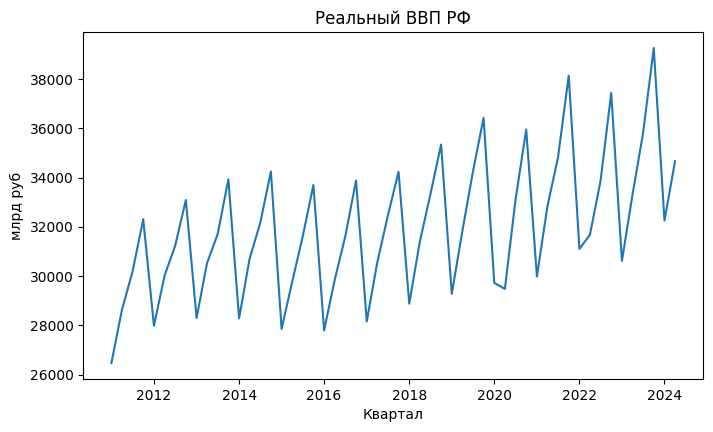

In [3]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(gdppc['RGDPRU'])
plt.xlabel('Квартал')
plt.ylabel('млрд руб')
plt.title('Реальный ВВП РФ')
plt.show()

### Курс USD/RUR

In [3]:
usdrub = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_usdrub.csv', sep = ';', index_col = 0)
usdrub.index = pd.to_datetime(usdrub.index, format = '%d.%m.%Y')
usdrub = usdrub.sort_index(ascending = True)
usdrub = usdrub.loc['1998':]
usdrub['curs'] = usdrub['curs'].astype(float)
usdrub.head()

,curs
data,
1998-01-01,5.960
1998-01-06,5.963
1998-01-07,5.969
1998-01-09,5.972
1998-01-10,5.974


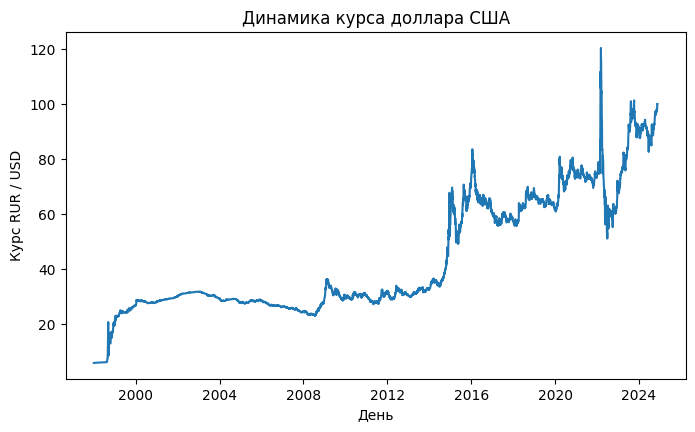

In [4]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(usdrub['curs'])
plt.xlabel('День')
plt.ylabel('Курс RUR / USD')
plt.title('Динамика курса доллара США')
plt.show()

### Продажи товара

In [46]:
sales = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_vinyl_sales.csv', index_col = 0)
sales.index = pd.to_datetime(sales.index)
sales.head()

,item_cnt_day
date,
2013-01-06,63.0
2013-01-13,55.0
2013-01-20,52.0
2013-01-27,89.0
2013-02-03,74.0


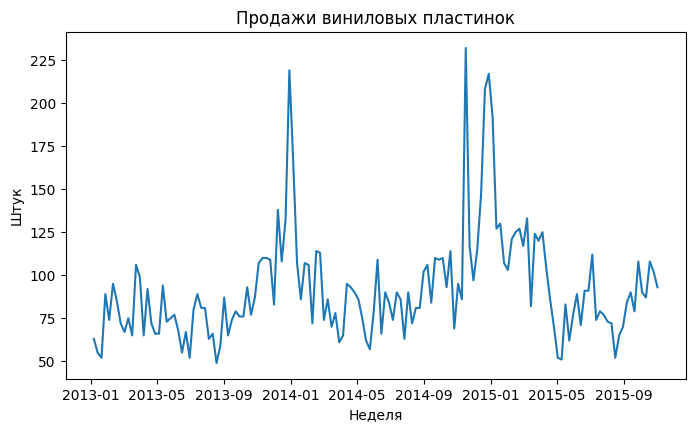

In [63]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(sales['item_cnt_day'])
plt.xlabel('Неделя')
plt.ylabel('Штук')
plt.title('Продажи виниловых пластинок')
plt.show()

### Курс акций Сбербанка

In [4]:
sber = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_sber.csv', index_col = 0)
sber['TRADEDATE'] = pd.to_datetime(sber['TRADEDATE'])
sber = sber.set_index('TRADEDATE', drop = True)
sber.head()

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76


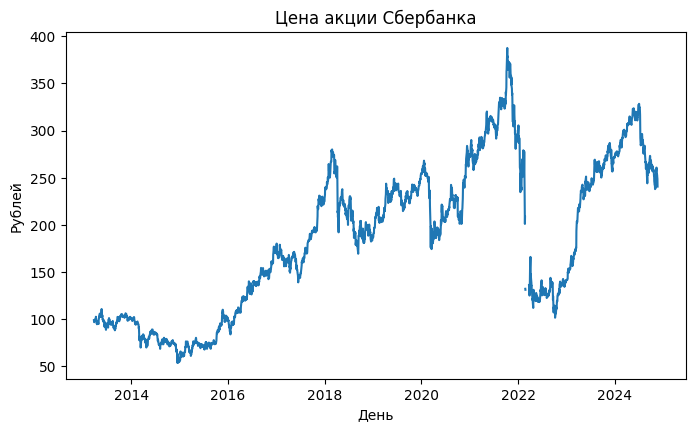

In [5]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(sber['CLOSE'])
plt.xlabel('День')
plt.ylabel('Рублей')
plt.title('Цена акции Сбербанка')
plt.show()

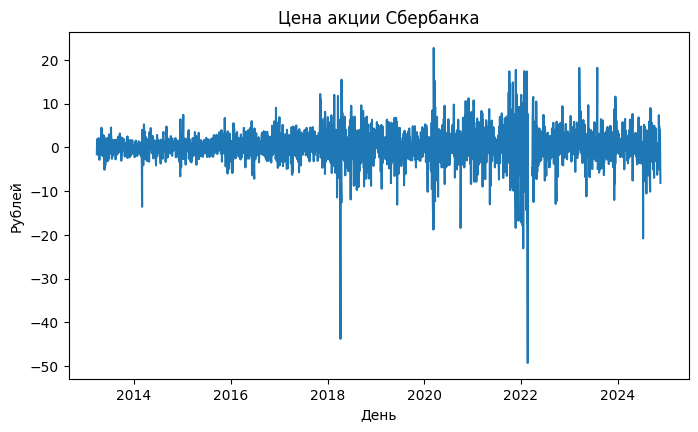

In [6]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(sber['CLOSE'].diff())
plt.xlabel('День')
plt.ylabel('Рублей')
plt.title('Первые разницы цены акции Сбербанка')
plt.show()

### Расчет лагов и изменений

In [89]:
y_t = sber.iloc[-1,0]
y_t_1 = sber.iloc[-2,0]
dy = y_t - y_t_1
ret = dy / y_t * 100
ln_ret = (np.log(y_t) - np.log(y_t_1))*100
print(y_t)
print(y_t_1)
print(dy)
print(ret)
print(ln_ret)

240.59
248.72
-8.129999999999995
-3.379192817656592
-3.3233525833442634
